**<h1>  Analysis of Indian Cuisine</h1>**

<img src="https://images.vexels.com/media/users/3/170980/raw/e2659d29d792757911dbd869a0dfb33f-indian-food-vector-set.jpg" id="img" style="width: 494px; height: 291px;">


<h2><b>Overview of Indian Cuisine</b></h2>


<p>Indians love to eat, and the variety of food ensures that each part of India will surprise you with a new dish. The diversity in soil, climate, rainfall patterns, farming methods, ethnic groups, culture, occupation, etc of people across the country makes the cuisine very widespread and vast. People use a wide variety of vegetables, dairy products, spices, herbs, etc to cook their food.</p>

<h2> <b>Introduction to Dataset</b> </h2>

<p> The data contains various information on Indian dishes. Data includes the name of the dish, main ingredients, diet type, preparation time of the dish, the cooking time of food, flavour profile of the dish, meal course, state of origin of the dish, and the region of the state.</p>

<h3> <b>Importing Necessary Libraries </b> </h3>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


print("✅ Libraries Imported Successfully")

✅ Libraries Imported Successfully


<h2><b>Reading the Dataset</b></h2>

In [ ]:
  df=pd.read_csv("/content/indian_food.csv")

<p>Let us now see how the data looks like.</p>

In [ ]:
df.head()

,name,ingredients,diet,prep_time,cook_time,flavor_profile,course,state,region
0,Balu shahi,"Maida flour, yogurt, oil, sugar",vegetarian,45,25,sweet,dessert,West Bengal,East
1,Boondi,"Gram flour, ghee, sugar",vegetarian,80,30,sweet,dessert,Rajasthan,West
2,Gajar ka halwa,"Carrots, milk, sugar, ghee, cashews, raisins",vegetarian,15,60,sweet,dessert,Punjab,North
3,Ghevar,"Flour, ghee, kewra, milk, clarified butter, su...",vegetarian,15,30,sweet,dessert,Rajasthan,West
4,Gulab jamun,"Milk powder, plain flour, baking powder, ghee,...",vegetarian,15,40,sweet,dessert,West Bengal,East


In [ ]:
# finding the shape of dataset
df.shape

(255, 9)

<p>The dataset  has a total of 255 records and 9 variables.</p>

In [ ]:
# Let us have a look at the data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255 entries, 0 to 254
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   name            255 non-null    object
 1   ingredients     255 non-null    object
 2   diet            255 non-null    object
 3   prep_time       255 non-null    int64 
 4   cook_time       255 non-null    int64 
 5   flavor_profile  255 non-null    object
 6   course          255 non-null    object
 7   state           255 non-null    object
 8   region          254 non-null    object
dtypes: int64(2), object(7)
memory usage: 18.1+ KB


<p>Only the prep_time and cook_time are numbers, which denote the dish preparation time and dish cooking time respectively. Others are all string fields.</p>

In [ ]:
#Let us have a look at the data distribution of the two numeric fields, that is prep_time and cook_time.

df.describe()

,prep_time,cook_time
count,255.000000,255.000000
mean,31.105882,34.529412
std,72.554409,48.265650
min,-1.000000,-1.000000
25%,10.000000,20.000000
50%,10.000000,30.000000
75%,20.000000,40.000000
max,500.000000,720.000000


<h1><b> Data Preprocessing</b></h1>

<h4> Handling missing and null values </h4>

In [ ]:
# Lets see the missing values in the dataset
df.isnull().sum()

name              0
ingredients       0
diet              0
prep_time         0
cook_time         0
flavor_profile    0
course            0
state             0
region            1
dtype: int64

In [ ]:
df[df.isnull().any(axis=1)]


,name,ingredients,diet,prep_time,cook_time,flavor_profile,course,state,region
110,Panjeeri,"Whole wheat flour, musk melon seeds, poppy see...",vegetarian,10,25,sweet,dessert,Uttar Pradesh,NaN


In [ ]:
# Our null value is from the Uttar Pradesh state, let's verify if there are any other meals from this state so we can check their region.
df[df['state'] == 'Uttar Pradesh']

,name,ingredients,diet,prep_time,cook_time,flavor_profile,course,state,region
6,Jalebi,"Maida, corn flour, baking soda, vinegar, curd,...",vegetarian,10,50,sweet,dessert,Uttar Pradesh,North
13,Petha,"Firm white pumpkin, sugar, kitchen lime, alum ...",vegetarian,10,30,sweet,dessert,Uttar Pradesh,North
15,Rabri,"Condensed milk, sugar, spices, nuts",vegetarian,10,45,sweet,dessert,Uttar Pradesh,North
18,Sohan halwa,"Corn flour, ghee, dry fruits",vegetarian,10,60,sweet,dessert,Uttar Pradesh,North
90,Kachori,"Moong dal, rava, garam masala, dough, fennel s...",vegetarian,30,60,spicy,snack,Uttar Pradesh,North
95,Kofta,"Paneer, potato, cream, corn flour, garam masala",vegetarian,20,40,spicy,main course,Uttar Pradesh,North
97,Lauki ke kofte,"Bottle gourd, garam masala powder, gram flour,...",vegetarian,20,40,spicy,main course,Uttar Pradesh,North
105,Navrattan korma,"Green beans, potatoes, khus khus, low fat, gar...",vegetarian,25,40,spicy,main course,Uttar Pradesh,North
110,Panjeeri,"Whole wheat flour, musk melon seeds, poppy see...",vegetarian,10,25,sweet,dessert,Uttar Pradesh,NaN


<p> We can see that all the meals from Uttar Pradesh are from the North region,so we can fill that one Nan value with north,for that we can either use replace or mode</p>

In [ ]:
#Correcting the entry and checking if it worked
#df['region'] = df['region'].replace(np.nan, 'North')
df["region"]=df["region"].fillna(df["region"].mode()[0])
df.isnull().sum()

name              0
ingredients       0
diet              0
prep_time         0
cook_time         0
flavor_profile    0
course            0
state             0
region            0
dtype: int64

<p> There are no null values left </p>

In [ ]:
# lets take the value count of all the columns to check what all values are there in the column
for column in df.columns:
    print(f"Value counts for {column}:\n{df[column].value_counts()}\n")
    print("------"*20)

Value counts for name:
Balu shahi         1
Chorafali          1
Vada               1
Chicken Varuval    1
Upma               1
                  ..
Kachori            1
Kadai paneer       1
Kadhi pakoda       1
Karela bharta      1
Pinaca             1
Name: name, Length: 255, dtype: int64

------------------------------------------------------------------------------------------------------------------------
Value counts for ingredients:
Gram flour, ghee, sugar                                                   2
Chhena, sugar, ghee                                                       2
Arbi ke patte, sesame seeds, gur, bengal gram flour, imli                 2
Green chilies, lemon juice, chili powder, boiled potatoes                 1
Whole wheat rava, chia seed, lemon, edible gum, litre milk                1
                                                                         ..
Cottage cheese, bell peppers, gravy, garam masala, cashew nuts            1
Besan, garam masala powd

<p> From the above we can see that there are values like -1 in prep time , cook time , flavor profile,state,region columns so we will see how we can replace -1</p>

In [ ]:
# let see first in prep time
df[df['prep_time']==-1]

,name,ingredients,diet,prep_time,cook_time,flavor_profile,course,state,region
19,Sohan papdi,"Gram flour, ghee, sugar, milk, cardamom",vegetarian,-1,60,sweet,dessert,Maharashtra,West
21,Chhena kheeri,"Chhena, sugar, milk",vegetarian,-1,60,sweet,dessert,Odisha,East
65,Pork Bharta,"Boiled pork, onions, chillies, ginger and garlic",non vegetarian,-1,-1,spicy,main course,Tripura,North East
132,Kaara kozhambu,"Sesame oil, drumstick, tamarind paste, sambar ...",vegetarian,-1,-1,spicy,main course,Tamil Nadu,South
134,Keerai masiyal,"Urad dal, curry leaves, sugar, mustard seeds, ...",vegetarian,-1,-1,spicy,main course,Tamil Nadu,South
148,Paravannam,"Raw rice, jaggery, milk",vegetarian,-1,-1,spicy,main course,Kerala,South
152,Poriyal,"Chana dal, urad dal, beans, coconut, mustard",vegetarian,-1,-1,spicy,main course,Tamil Nadu,South
167,Kolim Jawla,"Baingan, fish, coconut oil, fresh coconut, ginger",non vegetarian,-1,-1,spicy,main course,Maharashtra,West
172,Bombil fry,"Bombay duck, malvani masala, rice flour, bomba...",non vegetarian,-1,-1,spicy,main course,Maharashtra,West
185,Ghooghra,"Dry fruits, semolina, all purpose flour",vegetarian,-1,-1,spicy,snack,Gujarat,West


In [ ]:
len(df[df['prep_time']==-1])

30

In [ ]:
# In the problem description its given clearly, Presence of -1 in any of the columns indicates NaN value.
# replace -1 with null values can be done only with string.
df["prep_time"]=df["prep_time"].replace(-1,np.nan)
df["cook_time"]=df["cook_time"].replace({-1:np.nan})

In [ ]:
df["prep_time"]=df["prep_time"].fillna(df['prep_time'].mean())
df["cook_time"]=df["cook_time"].fillna(df['cook_time'].mean())

In [ ]:
# Converting into int datatype:

df["prep_time"]=df["prep_time"].astype(int)
df["cook_time"]=df["cook_time"].astype(int)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255 entries, 0 to 254
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   name            255 non-null    object
 1   ingredients     255 non-null    object
 2   diet            255 non-null    object
 3   prep_time       255 non-null    int64 
 4   cook_time       255 non-null    int64 
 5   flavor_profile  255 non-null    object
 6   course          255 non-null    object
 7   state           255 non-null    object
 8   region          255 non-null    object
dtypes: int64(2), object(7)
memory usage: 18.1+ KB


In [ ]:
df.describe()

,prep_time,cook_time
count,255.000000,255.000000
mean,35.341176,38.811765
std,71.597335,46.619036
min,5.000000,2.000000
25%,10.000000,25.000000
50%,15.000000,30.000000
75%,30.000000,40.000000
max,500.000000,720.000000


<p> now we will work on flavor profile replacing -1 to null values </p>

In [ ]:
df["flavor_profile"]=df["flavor_profile"].replace('-1',np.nan)

In [ ]:
df["flavor_profile"]=df["flavor_profile"].fillna(df['flavor_profile'].mode()[0])

In [ ]:
df["flavor_profile"].value_counts(dropna=False)

spicy     162
sweet      88
bitter      4
sour        1
Name: flavor_profile, dtype: int64

In [ ]:
# Checking Null values for  "State"

In [ ]:
df['state'].value_counts()

Gujarat            35
Punjab             32
Maharashtra        30
West Bengal        24
-1                 24
Assam              21
Tamil Nadu         20
Andhra Pradesh     10
Uttar Pradesh       9
Kerala              8
Odisha              7
Karnataka           6
Rajasthan           6
Telangana           5
Bihar               3
Goa                 3
Manipur             2
Jammu & Kashmir     2
Madhya Pradesh      2
Uttarakhand         1
Tripura             1
Nagaland            1
NCT of Delhi        1
Chhattisgarh        1
Haryana             1
Name: state, dtype: int64

In [ ]:
df['state'] = df['state'].replace('-1',np.nan)

In [ ]:
df['state']=df['state'].fillna(df["state"].mode()[0])

In [ ]:
df['state'].value_counts()

Gujarat            59
Punjab             32
Maharashtra        30
West Bengal        24
Assam              21
Tamil Nadu         20
Andhra Pradesh     10
Uttar Pradesh       9
Kerala              8
Odisha              7
Rajasthan           6
Karnataka           6
Telangana           5
Bihar               3
Goa                 3
Manipur             2
Jammu & Kashmir     2
Madhya Pradesh      2
Uttarakhand         1
Tripura             1
Nagaland            1
NCT of Delhi        1
Chhattisgarh        1
Haryana             1
Name: state, dtype: int64

In [ ]:
df["region"]=df["region"].replace('-1',np.nan)

In [ ]:
df["region"]=df['region'].fillna(df['region'].mode()[0])

In [ ]:
df["region"].value_counts()

West          88
South         59
North         49
East          31
North East    25
Central        3
Name: region, dtype: int64

<h2><b>Exploratory Data Analysis</b></h2>

<h3><b>Distribution of the states

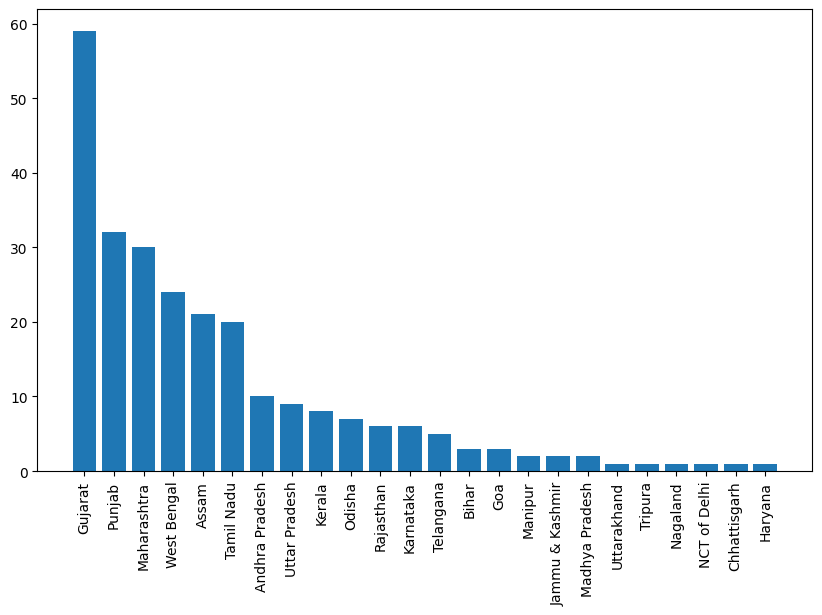

In [ ]:

state_count=df["state"].value_counts()
plt.figure(figsize=(10, 6))
plt.bar(state_count.index,state_count)
plt.xticks(rotation=90)
plt.show()

<h4><b> From the above graph we can see that the Largest entries are from the Gujarat</b></h4>

In [ ]:
# lets plot the region

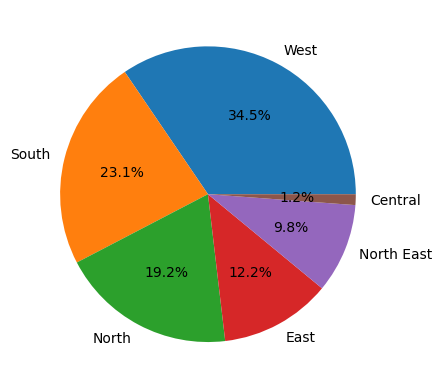

In [ ]:
region_counts=df["region"].value_counts()
plt.pie(region_counts,labels=region_counts.index,autopct='%1.1f%%')
plt.show()

<p> we can see that the majority of the dishes are from western region</p>

<h2><b>Proportion of Vegetarian and Non-Vegetarian dishes</b></h2>

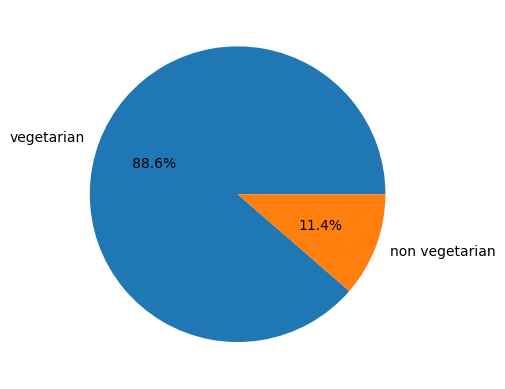

In [ ]:
diet_count=df["diet"].value_counts()
plt.pie(diet_count,labels=diet_count.index,autopct='%1.1f%%')
plt.show()

<p>observation:
Few of the dishes are non vegetarian rest all are vegetarian  </p>

<h2><b>Number of dishes based on courses of meal</b></h2>

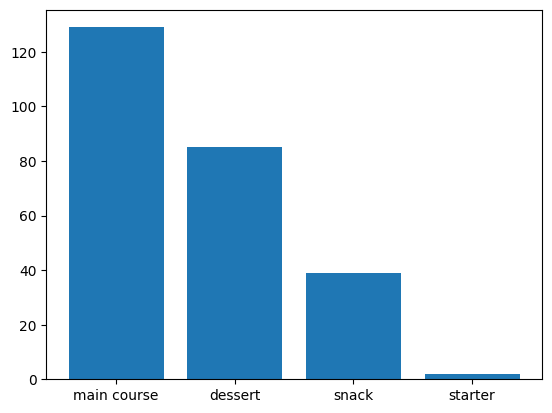

In [ ]:

course_count=df["course"].value_counts()
plt.bar(course_count.index,course_count)
plt.show()

<p>About 129 dishes are preferably eaten as a main course</p>

<h2><b> Different diet per region</b></h2>

<Axes: xlabel='region', ylabel='count'>

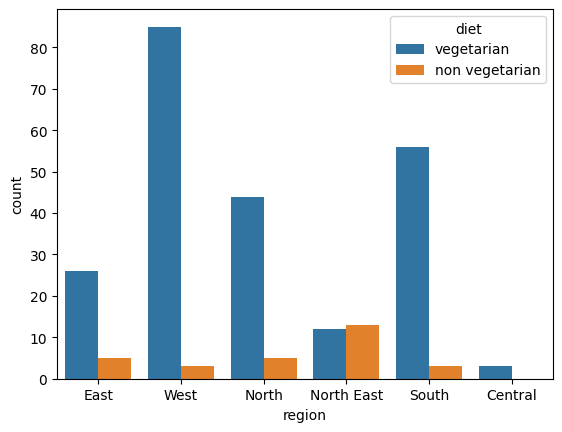

In [ ]:
sns.countplot(x='region', hue='diet', data=df)

<p><b>The majority of the non-veg dishes are in the Northeast region. Northern and western regions have very few non-veg dishes.</b></p>

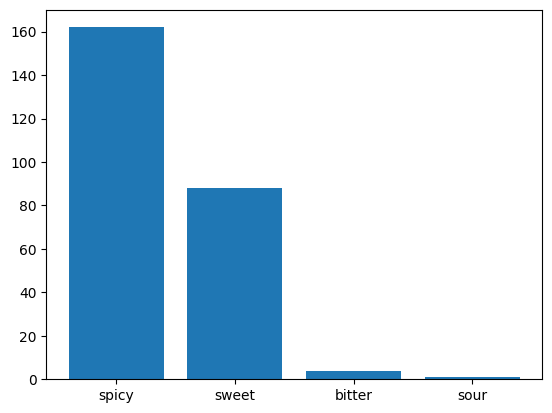

In [ ]:
flavour_count=df["flavor_profile"].value_counts()
plt.bar(flavour_count.index,flavour_count)
plt.show()

<p><b>Spicy food are more preferred </b> </p>

In [ ]:
df['ingredients'] = df['ingredients'].str.split(', ')

In [ ]:
df["ingredients"].value_counts()

[Gram flour, ghee, sugar]                                                   2
[Chhena, sugar, ghee]                                                       2
[Arbi ke patte, sesame seeds, gur, bengal gram flour, imli]                 2
[Green chilies, lemon juice, chili powder, boiled potatoes]                 1
[Whole wheat rava, chia seed, lemon, edible gum, litre milk]                1
                                                                           ..
[Cottage cheese, bell peppers, gravy, garam masala, cashew nuts]            1
[Besan, garam masala powder, gram flour, ginger, curry leaves]              1
[Bitter gourd, fennel, garam masala powder, chili powder, amchur powder]    1
[Moong dal, green peas, ginger, tomato, green chili]                        1
[Brown rice, fennel seeds, grated coconut, black pepper, ginger powder]     1
Name: ingredients, Length: 252, dtype: int64